# Data preparation

We gaan verder met de volgende stap; data preparation. In deze stap gaan we zorgen dat de dataset straks bruikbaar is om toe te passen binnen ons voorspellende model. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as date


pd.set_option('display.max_columns', None)

## 1. Onbruikbare kolommen 

### 1.1 Niet van toepassing

Allereerst verwijderen we de kolommen die volgens de volgens product owner niet van toepassing zijn binnen dit project. Het aantal kolommen is hierdoor ruim gehalveerd. 

In [2]:
usefullcols = ['stm_mon_nr','stm_sap_meld_ddt','stm_status_melding_sap','stm_km_van_mld','stm_km_tot_mld','stm_km_van_gst',
'stm_km_tot_gst','stm_fh_tijd','stm_sap_melddatum','stm_aanngeb_tijd','stm_aanntpl_tijd','stm_arbeid',
'stm_progfh_in_tijd','stm_progfh_in_invoer_tijd','stm_progfh_in_duur','stm_sap_storeindtijd','stm_progfh_gw_tijd',
'stm_reactie_duur','stm_progfh_gw_duur','stm_progfh_gw_teller','stm_afspr_aanvangdd','stm_afspr_aanvangtijd',
'stm_fh_duur','stm_evb','stm_sap_meldtijd','stm_sap_meldtekst_lang','stm_prioriteit','stm_oh_pg_gst',
'stm_sap_meldtekst','stm_techn_gst','stm_contractgeb_gst','stm_tao_indicator','stm_geo_mld','stm_functiepl_mld',
'stm_geo_mld_uit_functiepl','stm_aanngeb_ddt','stm_aanngeb_dd','stm_oorz_code','stm_oorz_groep','stm_oorz_tkst',
'stm_fh_dd','stm_fh_status','stm_geo_gst','stm_functiepl_gst','stm_geo_gst_uit_functiepl','stm_fh_ddt',
'stm_aanntpl_dd','stm_techn_mld','stm_sap_storeinddatum','stm_equipm_nr_mld','stm_equipm_soort_mld',
'stm_equipm_omschr_mld','stm_sap_storeind_ddt','stm_contractgeb_mld','stm_equipm_nr_gst','stm_equipm_soort_gst',
'stm_equipm_omschr_gst','stm_progfh_in_invoer_dat','stm_progfh_in_datum','stm_oorz_tekst_kort','stm_dstrglp_naar',
'stm_tao_indicator_vorige','stm_vl_post','stm_dstrglp_van','stm_pplg_van','stm_tao_soort_mutatie',
'stm_progfh_gw_lwd_tijd','stm_pplg_naar','stm_progfh_gw_lwd_datum']

nvt = ['stm_sap_mon_meld_ddt','stm_mon_begin_ddt','stm_mon_toelichting_trdl','stm_oh_pg_mld','stm_scenario_mon','stm_mon_nr_status_omschr',
'stm_mon_nr__statuscode','stm_mon_nr_status_wijzdd','stm_aanntpl_ddt','stm_objectdl_code_gst','stm_objectdl_groep_gst',
'stm_progfh_in_ddt','stm_progfh_in_invoer_ddt','stm_progfh_gw_ddt','stm_progfh_gw_lwd_ddt','stm_progfh_hz','stm_veroorz_groep',
'stm_veroorz_code','stm_veroorz_tekst_kort','stm_effect','stm_afspr_aanvangddt','stm_mon_eind_ddt','stm_mon_vhdsincident',
'stm_dir_betrok_tr','stm_aangelegd_dd','stm_aangelegd_tijd','stm_mon_begindatum','stm_mon_begintijd','stm_progfh_gw_datum',
'stm_mon_eind_datum','stm_mon_eind_tijd','stm_controle_dd','stm_akkoord_mon_toewijz','stm_status_sapnaarmon','stm_fact_jn',
'stm_akkoord_melding_jn','stm_afsluit_ddt','stm_afsluit_dd','stm_afsluit_tijd','stm_rec_toegev_ddt','stm_hinderwaarde','stm_actie',
'stm_standplaats','stm_status_gebr','stm_wbi_nummer','stm_projnr','stm_historie_toelichting','stm_schade_verhaalb_jn','stm_schadenr',
'stm_schade_status_ga','stm_schade_statusdatum','stm_relatiervo_vorig','stm_relatiervo_volgend','stm_relatiervo','stm_afspr_func_hersteldd',
'stm_afspr_func_hersteltijd','stm_sorteerveld','stm_rapportage_maand','stm_rapportage_jaar','stm_x_bron_publ_dt','stm_x_bron_bestandsnaam',
'stm_x_bron_arch_dt','stm_x_actueel_ind','stm_x_run_id','stm_x_bk','stm_x_start_sessie_dt','stm_x_vervallen_ind']

In [3]:
df = pd.read_csv('sap_storing_data_hu_project.csv',usecols=usefullcols, low_memory=True)

/Users/jet/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,24,27,49,51,55,56,73,75,78,80,82,86,87,91,95,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1.2 Lege waardes

We willen op een manier in kaart brengen welke kolommen wel en niet moeten worden meegenomen binnen ons model. Hieronder tonen we een grafiek van de verschillende kolommen en hoeveel waardes deze kolommen bevatten. We zien duidelijk dat elke kolom met een id hoger dan 30 bestaat uit aanzienlijk weinig waardes. 

In [4]:
def initEmpty():
    empty = df.isna().sum().to_frame(name='count').reset_index().rename(columns={"index":"colnames"})
    return empty[empty['count'] > 0].sort_values(by='count',ascending=False).reset_index(drop=True)
empty = initEmpty()

In [5]:
f'There are a total of {empty.shape[0]} columns with empty values.'

'There are a total of 69 columns with empty values.'

<AxesSubplot:xlabel='index'>

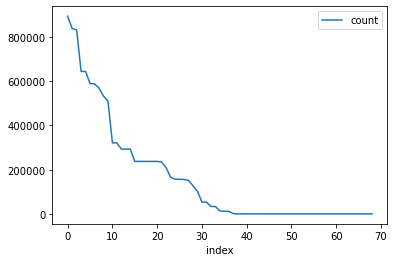

In [6]:
empty.reset_index().plot(kind='line', x='index', y='count')

Hieronder tonen we een overzicht die het aantal nullwaardes per kolom telt en een percentage geeft dat laat zien hoeveel procent van die kolom bestaat uit null waardes. Dit overzicht geeft aan dat kolommen met een id tot ongeveer 30 heel veel lege waardes bevatten. Vanaf ongeveer kolom met id 37 is dit gehalte een stuk lager. 

In [7]:
def showEmpty(_empty):
    _empty['perc'] = _empty['count'] / df.shape[0] * 100
    print(f'De verhouding afwezige waardes op het totaal')
    display(_empty[:37])
    display(_empty[37:])
showEmpty(initEmpty())

De verhouding afwezige waardes op het totaal


,colnames,count,perc
0,stm_progfh_gw_lwd_datum,893514,99.442198
1,stm_pplg_naar,838138,93.279215
2,stm_progfh_gw_lwd_tijd,831834,92.577622
3,stm_tao_soort_mutatie,644026,71.675834
4,stm_pplg_van,643777,71.648121
5,stm_dstrglp_van,589042,65.556478
6,stm_vl_post,588027,65.443515
7,stm_tao_indicator_vorige,568685,63.290879
8,stm_dstrglp_naar,532766,59.293332
9,stm_oorz_tekst_kort,509896,56.748052


,colnames,count,perc
37,stm_tao_indicator,1318,0.146685
38,stm_techn_gst,223,0.024818
39,stm_contractgeb_gst,223,0.024818
40,stm_sap_meldtekst,199,0.022147
41,stm_oh_pg_gst,189,0.021034
42,stm_prioriteit,161,0.017918
43,stm_sap_meldtekst_lang,140,0.015581
44,stm_fh_duur,38,0.004229
45,stm_reactie_duur,38,0.004229
46,stm_fh_tijd,38,0.004229


In [8]:
','.join(empty[37:]['colnames'])


'stm_tao_indicator,stm_techn_gst,stm_contractgeb_gst,stm_sap_meldtekst,stm_oh_pg_gst,stm_prioriteit,stm_sap_meldtekst_lang,stm_fh_duur,stm_reactie_duur,stm_fh_tijd,stm_sap_storeindtijd,stm_afspr_aanvangtijd,stm_afspr_aanvangdd,stm_progfh_gw_teller,stm_progfh_gw_duur,stm_sap_meldtijd,stm_progfh_gw_tijd,stm_progfh_in_duur,stm_progfh_in_invoer_tijd,stm_progfh_in_tijd,stm_arbeid,stm_aanntpl_tijd,stm_aanngeb_tijd,stm_sap_melddatum,stm_evb,stm_km_tot_gst,stm_km_van_gst,stm_status_melding_sap,stm_km_tot_mld,stm_km_van_mld,stm_sap_meld_ddt,stm_mon_nr'

### 1.3 Dubbele kolommen

Bij kolommen met identieke data verwijderen we de kolom met het minst aantal waardes. Wanneer er is mismatch is in de populatie voegen we de kolommen samen. 

In [9]:
dubbleCol = ['stm_equipm_omschr_*', 'stm_equipm_soort_*', 'stm_equipm_nr_*', 
             'stm_geo_*_uit_functiepl', 'stm_functiepl_*', 'stm_geo_*',
            'stm_km_van_*','stm_km_tot_*',
            'stm_contractgeb_*','stm_techn_*']
original = 'mld'
optional = ['gst'] # Order of least to most important
for colPH in dubbleCol:
    colOg = colPH.replace('*',original)
    
    for option in optional:
        colOp = colPH.replace('*',option)
        df[colPH] = np.where(df[colOp].isna(), df[colOg], df[colOp])
        df.drop(columns=[colOp],inplace=True)
    df.drop(columns=[colOg],inplace=True)

In [10]:
toDrop = ['stm_sap_meld_ddt','stm_sap_melddatum','stm_sap_meldtijd',
         'stm_fh_tijd','stm_sap_storeindtijd']
df.dropna(subset=toDrop,inplace=True)
df.shape

(898488, 59)

In [11]:
df.drop_duplicates(subset=['stm_mon_nr'], keep='last',inplace = True)
df.shape

(169101, 59)

## 2. Kansrijke variabelen
### 2.1 Feature variabelen

We willen onderscheid tussen maken tussen belangrijke kolommen die kunnen dienen als feature variabelen, en variabelen die hiervoor niet belangrijk zijn. Omdat we de belangrijke kolommen niet willen droppen en we ook niet willen dat er veel lege waardes staan in deze kolommen, vullen we de lege waardes op met een default waarde.  

In [12]:
df['stm_prioriteit'] = df['stm_prioriteit'].fillna(1) # Laagste prioriteit
df['stm_oorz_code'] = df['stm_oorz_code'].fillna(299) # 'Niet gemeld' code
df['stm_fh_status'] = df['stm_fh_status'].fillna(1) # Mediaan
df['stm_aanngeb_tijd'] = df['stm_aanngeb_tijd'].fillna(df['stm_sap_meldtijd']) # Aannemer beltijd gelijk met melding zetten.
df['stm_progfh_in_invoer_tijd'] = df['stm_progfh_in_invoer_tijd'].fillna(df['stm_aanngeb_tijd']) # Tijd van prognose op beltijd zetten.
df['stm_equipm_nr_*'] = df['stm_equipm_nr_*'].fillna(0)
df['stm_contractgeb_*'] = df['stm_contractgeb_*'].fillna(0)

In [13]:
features = ['stm_prioriteit','stm_oorz_code','stm_oorz_groep','stm_equipm_soort_*','stm_geo_*']

### 2.2 Target variabele

De target variabele die we willen gaan voorspellen is de duur van de storing. 

In [14]:
target = 'duur'

De 'duur' variabele kan berekend worden door het moment dat de aannemer ter plaatste is af te trekken van het tijdstip van functieherstel. 

We willen hele korte en hele lange storingen verwijderen uit de dataset, zo droppen we dus elke storing die korter duurt dan 5 minuten of langer dan 6 uur. 

In [15]:
now = date.datetime.today()
zeroTimeDiff = now - now

df['stm_aanntpl_ddt'] = pd.to_datetime(df['stm_aanntpl_dd']+' '+df['stm_aanntpl_tijd'], format='%d/%m/%Y %H:%M:%S')
df['stm_fh_ddt'] = pd.to_datetime(df['stm_fh_ddt'], format='%d/%m/%Y %H:%M:%S')

df.dropna(subset=['stm_aanntpl_dd','stm_aanntpl_tijd','stm_fh_ddt'],inplace=True)

df['duur'] = df['stm_fh_ddt'] - df['stm_aanntpl_ddt']
df.dropna(subset=['duur'],inplace=True)

# Meldingen waar de oplossing in de toekomst is zijn onzin.
# df[df['stm_sap_storeind_ddt'] >= now][['stm_sap_storeind_ddt','stm_sap_meld_ddt']]
# df.drop(df[df['stm_sap_storeind_ddt'] >= now][['stm_sap_storeind_ddt','stm_sap_meld_ddt']].index,inplace=True)

# Rijen waar het probleem sneller is opgelost dan 5 minuten (en ook de meldingen tijd) zijn onbetrouwbaar.
df.drop(df[df['duur'] <= date.timedelta(minutes=5)].index, inplace = True)

# # Alles wat langer dan een dag duurt is niet urgent genoeg en dus niet nuttig.
df.drop(df[df['duur'] > date.timedelta(hours=6)].index, inplace = True)

In [16]:
display(df[['duur']])
print(df['duur'].shape)

,duur
32099,0 days 00:40:00
60683,0 days 00:15:00
85621,0 days 00:35:00
91875,0 days 03:40:19
92852,0 days 00:55:00
...,...
898355,0 days 00:18:00
898368,0 days 01:30:00
898413,0 days 00:39:54
898475,0 days 00:58:00


(66657,)


## 3. Datatypes omzetten

Er zijn veel waardes in de dataset die momenteel nog als datatype "float" aangegeven worden, deze kunnen vaak ook als integers worden weergegeven. We zetten voor deze waardes het datatype om van een float naar een int. 

In [17]:
df['stm_prioriteit'] = df['stm_prioriteit'].astype(int)
df['stm_oorz_code'] = df['stm_oorz_code'].astype(int)
df['stm_fh_status'] = df['stm_fh_status'].astype(int)
df['stm_progfh_gw_teller'] = df['stm_progfh_gw_teller'].astype(int)
df['stm_equipm_nr_*'] = df['stm_equipm_nr_*'].astype(int)
df['stm_contractgeb_*'] = df['stm_contractgeb_*'].astype(int)

df['stm_sap_meld_ddt'] = pd.to_datetime(df['stm_sap_meld_ddt'], format='%d/%m/%Y %H:%M:%S')
df['stm_sap_storeind_ddt'] = pd.to_datetime(df['stm_sap_storeind_ddt'], format='%d/%m/%Y %H:%M:%S')

Nu dat we de bewerkingen op de data hebben uitgevoerd, kunnen we de data gaan gebruiken in de voorspellende modellen. 